In [114]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pipeline.prepare import prepare_data_aflw2k3d, prepare_data_kaggle
from pipeline.model import create_model
from pipeline.evaluate import plot_learning_curves

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
train_dir = 'data/kaggle/training.csv'
test_dir = 'data/kaggle/test.csv'
lookid_dir = 'data/kaggle/IdLookupTable.csv'
train_data = pd.read_csv(train_dir)  
test_data = pd.read_csv(test_dir)
lookid_data = pd.read_csv(lookid_dir)

In [139]:
x, y = prepare_data_kaggle(train_data)

In [143]:
model = create_model((96,96,1), 30)

In [ ]:
history = model.fit(x, y, batch_size=256, epochs=20, validation_split = 0.2)

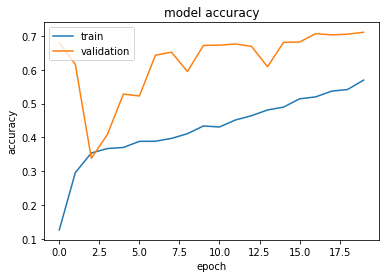

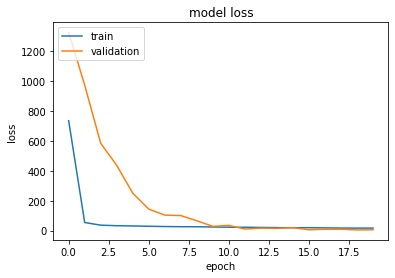

In [103]:
plot_learning_curves(history)

In [107]:
predicts = model.predict(X_train[:10])

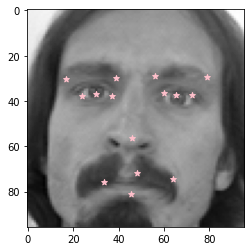

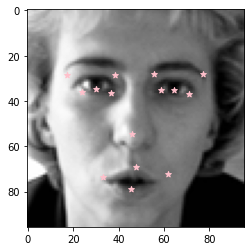

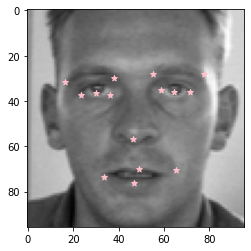

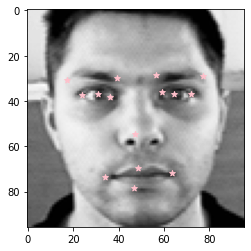

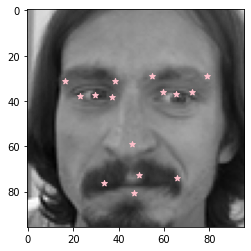

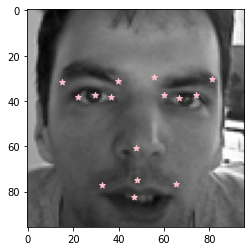

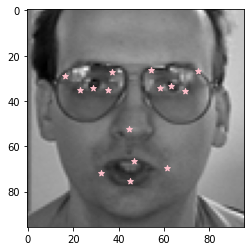

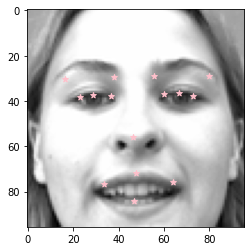

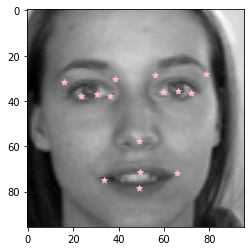

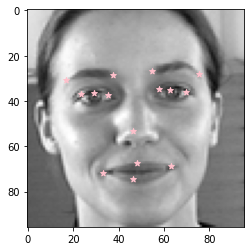

In [111]:
predicts = model.predict(X_train[:10])
for i in range(len(predicts)):
    plt.imshow(np.uint8(x[i]), cmap='gray')
    plt.scatter(predicts[i][0::2], predicts[i][1::2], c='Pink', marker='*')
    plt.show()

In [106]:
model.save('deepmoji')

INFO:tensorflow:Assets written to: deepmoji/assets


In [115]:
tfjs.converters.save_keras_model(model, 'deepmoji_tfjs')